In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1. 结构元

In [3]:
K1 = np.ones((3,3), np.uint8)
K1

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [4]:
K2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))
K2

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

## 2.1 腐蚀

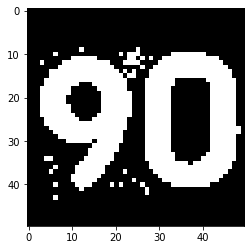

In [5]:
img = cv.imread('pic/ninety_bin50x50.png', -1)
show(img)

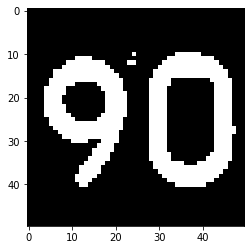

In [7]:
K1 = np.ones((1,3), np.uint8)
img_erode = cv.erode(img, K1)

show(img_erode)

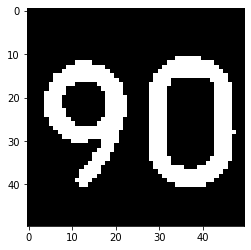

In [9]:
K1 = np.ones((2,3), np.uint8)
img_erode2 = cv.morphologyEx(img, cv.MORPH_ERODE, K1)

show(img_erode2)

## 2.2 膨胀

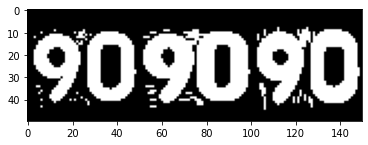

In [11]:
img = cv.imread('pic/ninety_bin50x50.png', -1)

K = cv.getStructuringElement(cv.MORPH_RECT, (3,1))
img_dilate = cv.dilate(img, K)

K2 = cv.getStructuringElement(cv.MORPH_RECT, (1,3))
img_dilate2 = cv.morphologyEx(img, cv.MORPH_DILATE, K2)

show(np.hstack([img, img_dilate, img_dilate2]))

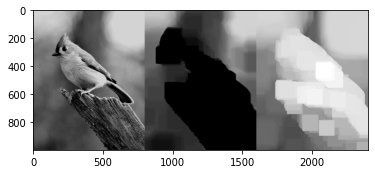

In [14]:
img = cv.imread('pic/bird1000x800.jpg', 0)

K = cv.getStructuringElement(cv.MORPH_RECT, (111,111))
img_erode = cv.erode(img, K)
img_dilate = cv.dilate(img, K)

show(np.hstack([img, img_erode, img_dilate]))

## 3.1 开运算

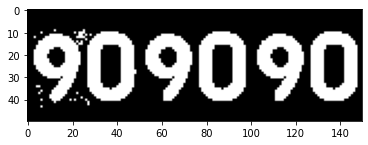

In [5]:
img = cv.imread('pic/ninety_bin50x50.png', -1)

# 腐蚀 + 膨胀
K = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
img_open = cv.dilate(cv.erode(img, K), K)
img_open2 = cv.morphologyEx(img, cv.MORPH_OPEN, K)

show(np.hstack([img, img_open, img_open2]))

## 3.2 闭运算

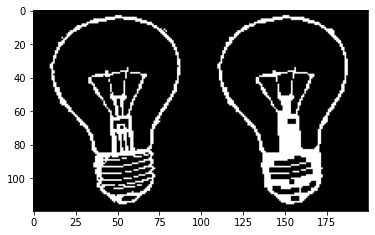

In [9]:
img = cv.imread('pic/bulk_bin120x100.png', -1)

K = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
img_close = cv.morphologyEx(img, cv.MORPH_CLOSE, K)

show(np.hstack([img, img_close]))

## 3.3 形态学梯度

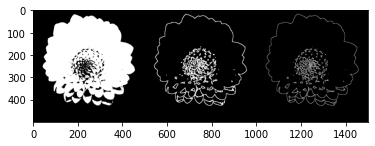

In [12]:
img = cv.imread('pic/flower_bin500x500.png', -1)

K = np.ones((3,3), np.uint8)
img_grad1 = cv.morphologyEx(img, cv.MORPH_GRADIENT, K)
img_grad2 = cv.subtract(cv.dilate(img, K), img)

show(np.hstack([img, img_grad1, img_grad2]))

## 4.1 顶帽变换

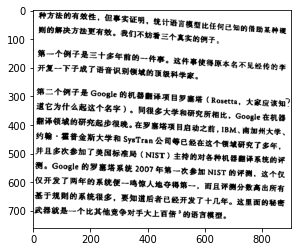

In [43]:
# 1
I = cv.imread('pic/page760x900.jpg', 0)
# 2
Ic = 255 - I
# 3
K = np.ones((21, 21), np.uint8)
Ic_open = cv.morphologyEx(Ic, cv.MORPH_OPEN, K)
# 4
Ic_tophat = cv.subtract(Ic, Ic_open)
# 5
_, Ic_bin = cv.threshold(Ic_tophat, 25, 255, 0)
# 6
I_bin = 255 - Ic_bin

show(I_bin)

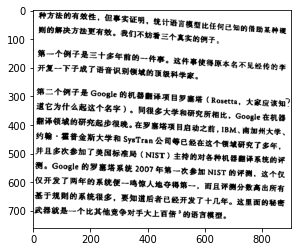

In [44]:
# 1
I = cv.imread('pic/page760x900.jpg', 0)
# 2
Ic = 255 - I
# 3
K = np.ones((21, 21), np.uint8)
Ic_tophat = cv.morphologyEx(Ic, cv.MORPH_TOPHAT, K)
# 5
_, Ic_bin = cv.threshold(Ic_tophat, 25, 255, 0)
# 6
I_bin = 255 - Ic_bin

show(I_bin)

## 4.2 底帽变换

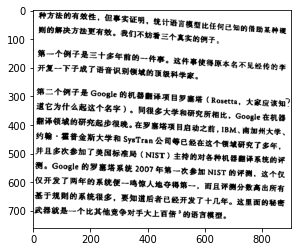

In [47]:
# 1
I = cv.imread('pic/page760x900.jpg', 0)

K = np.ones((21, 21), np.uint8)
I_blackhat = cv.morphologyEx(I, cv.MORPH_BLACKHAT, K)

_, Ic_bin = cv.threshold(I_blackhat, 25, 255, 0)

I_bin = 255 - Ic_bin

show(I_bin)

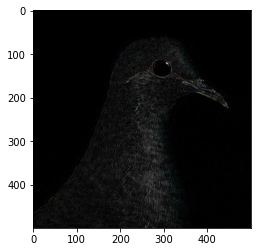

In [49]:
img = cv.imread('pic/foolbird500x500.jpg')

K = np.ones((5, 5), np.uint8)
I_blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, K)

show(I_blackhat)

## 5. 击中击不中变换

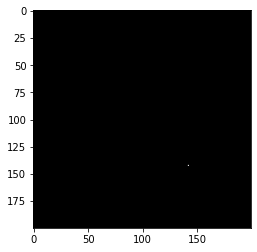

In [69]:
I = cv.imread('pic/rectangle_find35.png', -1)

K = np.zeros((37,37), np.uint8)
K[1:36, 1:36] = 1

IeK = cv.erode(I, K)

Ic = 255 - I
Kc = 1 - K

IceKc = cv.erode(Ic, Kc)

hitmiss = cv.bitwise_and(IeK, IceKc)

show(hitmiss)

In [70]:
x, y = np.where(hitmiss == 255)
print(x, y)

[142] [142]
